# Osztályozás

Mikor a prediktív modellezés célváltozója diszkrét, a feladatot [osztályozásnak](https://en.wikipedia.org/wiki/Statistical_classification) hívjuk. Annak az előrejelzése például, hogy egy banki ügyfél felveheti-e vagy sem a kért hitelt, egy osztályozási feladat mivel a célváltozó bináris értékű (pozitív elbírálás, elutasítás).

## Példa

Tekintsük azt a feladatot, amelyben virágok fajtáját ( nőszirom (Setosa), foltos nőszirom (Versicolor), vagy virginiai nőszirom (Virginica)) szeretnénk előrejelezni [tulajdonságaik alapján](https://en.wikipedia.org/wiki/Iris_flower_data_set) (virágszirom, csészelevél méretek).

![](https://upload.wikimedia.org/wikipedia/commons/5/56/Iris_dataset_scatterplot.svg) 

Ábra 1. Az [Írisz adatállomány](https://archive.ics.uci.edu/ml/datasets/iris) 150 virágának ábrázolása a karakterisztikáik szerint.[Forrás](https://upload.wikimedia.org/wikipedia/commons/5/56/Iris_dataset_scatterplot.svg).

### Osztályozás - scikit learn

[Forrás 1](https://towardsdatascience.com/exploring-classifiers-with-python-scikit-learn-iris-dataset-2bcb490d2e1b), [forrás 2](https://github.com/girishp92/Classification-of-Iris-Data-using-Machine-learning-methods-in-Python).

In [33]:
import sys
import scipy
import numpy as np
import matplotlib
import pandas
import sklearn

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


#load dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length','sepal-width','petal-length','petal-width','class']
dataset = pandas.read_csv(url, names=names)

In [ ]:
print(dataset.shape)

In [ ]:
print(dataset.head(20))

In [ ]:
print(dataset.describe())

In [ ]:
print(dataset.groupby('class').size())

In [ ]:
#box and wisker plots
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

In [ ]:
# histograms
dataset.hist()
plt.show()

In [39]:
#split-out validation dataset
array = dataset.values
X = array[:,0:4]
Y = array[:,4]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [ ]:
# Test options and evaluation metric
seed = 7
scoring = 'accuracy'

#spot check algorithms

models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN',KNeighborsClassifier() ))
models.append(('CART', DecisionTreeClassifier() ))
models.append(('NB',GaussianNB() ))
models.append(('SVM', SVC() ))

#evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    #print(cv_results)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

#compare algorithms
    fig = plt.figure()
    fig.suptitle('Algorithm Comparison')
    ax = fig.add_subplot(111)
    plt.boxplot(results)
    ax.set_xticklabels(names) 
    plt.show()

#make predicitions on validation dataset

    knn = KNeighborsClassifier()
    knn.fit(X_train, Y_train)
    predictions = knn.predict(X_validation)
    print(accuracy_score(Y_validation, predictions))
    print(confusion_matrix(Y_validation, predictions))
    print(classification_report(Y_validation, predictions))

# Feladatok

1.	Elemezzük és tisztítsuk meg a `dbalance.csv` fájl adatait. Az attribútumok leírása, az értékek várt eloszlása a `dbalance.txt` fájlban található.
2.	Hány adatunk van és mi az osztályelosztás?
3.	Építsünk egy döntési fa és egy naiv Bayes-féle osztályozó modellt az adatokra.
4.	Írassuk ki a konfúziós mátrixot, az átlag pontosságot, F1-mértéket a [beépített metrika függvények](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics) meghívásával.


In [41]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [56]:
# 1.
names = ['osztaly_neve','bal_oldali_suly','bal_tavolsag','jobb_oldali_suly','jobb_tavlosag']
dataset = pd.read_csv('/content/drive/MyDrive/dbalance.csv', names=names)

print(dataset.shape)

dataset.drop(dataset[(dataset['osztaly_neve'] != 'L') & (dataset['osztaly_neve'] != 'R') & (dataset['osztaly_neve'] != 'B') ].index, inplace = True)

dataset.drop(dataset[(dataset['bal_oldali_suly'] != '1') & (dataset['bal_oldali_suly'] != '2') & (dataset['bal_oldali_suly'] != '3') & (dataset['bal_oldali_suly'] != '4') & (dataset['bal_oldali_suly'] != '5') ].index, inplace = True)
dataset.drop(dataset[(dataset['bal_tavolsag'] != '1') & (dataset['bal_tavolsag'] != '2') & (dataset['bal_tavolsag'] != '3') & (dataset['bal_tavolsag'] != '4') & (dataset['bal_tavolsag'] != '5') ].index, inplace = True)
dataset.drop(dataset[(dataset['jobb_oldali_suly'] != '1') & (dataset['jobb_oldali_suly'] != '2') & (dataset['jobb_oldali_suly'] != '3') & (dataset['jobb_oldali_suly'] != '4') & (dataset['jobb_oldali_suly'] != '5') ].index, inplace = True)
dataset.drop(dataset[(dataset['jobb_tavlosag'] != '1') & (dataset['jobb_tavlosag'] != '2') & (dataset['jobb_tavlosag'] != '3') & (dataset['jobb_tavlosag'] != '4') & (dataset['jobb_tavlosag'] != '5') ].index, inplace = True)
dataset["bal_oldali_suly"] = pd.to_numeric(dataset["bal_oldali_suly"])
dataset["bal_tavolsag"] = pd.to_numeric(dataset["bal_tavolsag"])
dataset["jobb_oldali_suly"] = pd.to_numeric(dataset["jobb_oldali_suly"])
dataset["jobb_tavlosag"] = pd.to_numeric(dataset["jobb_tavlosag"])

dataset=dataset.reset_index(drop=True)

print(dataset)

(628, 5)
    osztaly_neve  bal_oldali_suly  bal_tavolsag  jobb_oldali_suly  \
0              B                1             1                 1   
1              R                1             1                 1   
2              R                1             1                 1   
3              R                1             1                 1   
4              R                1             1                 1   
..           ...              ...           ...               ...   
605            L                5             5                 4   
606            L                5             5                 5   
607            L                5             5                 5   
608            L                5             5                 5   
609            L                5             5                 5   

     jobb_tavlosag  
0                1  
1                2  
2                3  
3                4  
4                5  
..             ...  
605            

       bal_oldali_suly  bal_tavolsag  jobb_oldali_suly  jobb_tavlosag
count       610.000000    610.000000        610.000000     610.000000
mean          2.986885      3.006557          2.983607       2.998361
std           1.411828      1.415359          1.414118       1.417112
min           1.000000      1.000000          1.000000       1.000000
25%           2.000000      2.000000          2.000000       2.000000
50%           3.000000      3.000000          3.000000       3.000000
75%           4.000000      4.000000          4.000000       4.000000
max           5.000000      5.000000          5.000000       5.000000
osztaly_neve
B     44
L    283
R    283
dtype: int64


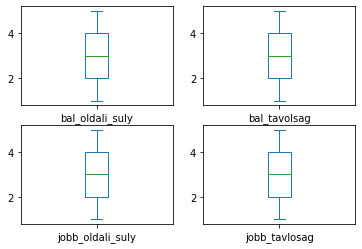

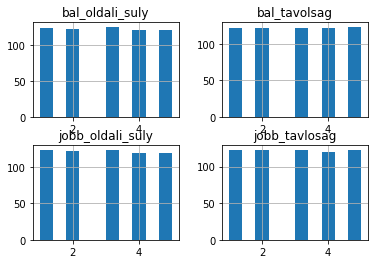

In [55]:
# 2.
print(dataset.describe())
print(dataset.groupby('osztaly_neve').size())
#box and wisker plots
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()
# histograms
dataset.hist()
plt.show()

In [54]:
# 3.
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

target = dataset.osztaly_neve
inputs = dataset.drop('osztaly_neve', axis='columns')

X_train, X_test, y_train, y_test = train_test_split(inputs, target, test_size=0.3)

model = GaussianNB()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9398907103825137

Confusion matrix, without normalization
[[ 0  5  5]
 [ 0 91  6]
 [ 0  3 73]]
Normalized confusion matrix
[[0.   0.5  0.5 ]
 [0.   0.94 0.06]
 [0.   0.04 0.96]]


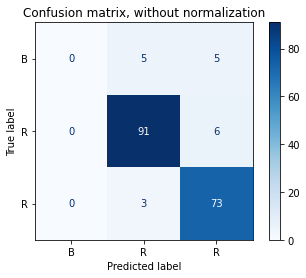

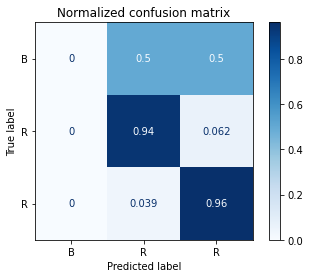

GaussianNB F1 score:  0.69


In [53]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import svm, datasets

classifier = svm.SVC(kernel="linear", C=0.01).fit(X_train, y_train)

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        classifier,
        X_test,
        y_test,
        display_labels=dataset['osztaly_neve'],
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

from sklearn.metrics import f1_score

# instantiate
gnb = GaussianNB()

# fit
gnb.fit(X_train, y_train)

# predict
y_pred_2 = gnb.predict(X_test)

# f1 score
score_2 = f1_score(y_pred_2, y_test, average='macro')

# print
print("GaussianNB F1 score: {: .2f}".format(score_2))